In [1]:
import pandas as pd
df = pd.read_csv("dataset\ILPD\ilpd.csv")
df.head()

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,ag_ratio,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
LD, NLD = df['class'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


In [3]:
df['class'].value_counts()

1    416
2    167
Name: class, dtype: int64

In [4]:
df['class'] = df['class'].apply(lambda x: 0 if x == 2 else x)

In [5]:
df['class'].value_counts()

1    416
0    167
Name: class, dtype: int64

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

# Load your dataset
data = df.copy().dropna()

# Identify non-numeric columns and encode them using Label Encoding
non_numeric_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in non_numeric_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numeric columns (excluding 'class') using StandardScaler
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('class')
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Assuming 'class' is the column with binary labels (0 for Healthy, 1 for Disease)
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the probabilities of disease
risk_probabilities = model.predict_proba(X)[:, 1]

# Predict the class labels
predictions = model.predict(X)

# Calculate risk factors (percentages) based on predicted probabilities
risk_factors = risk_probabilities * 100

# Create a dataframe to store results
results_df = pd.DataFrame({
    'Sample': range(1, len(X) + 1),
    'Risk Factor': risk_factors,
    'Predicted Label': ['Healthy' if label == 0 else 'Disease' for label in predictions],
    'Original Label': ['Healthy' if label == 0 else 'Disease' for label in y]
})


# Classification report for training set
train_predictions = model.predict(X_train)
train_report = classification_report(y_train, train_predictions)
print("Training Set Classification Report:")
print(train_report)

# Classification report for test set
test_predictions = model.predict(X_test)
test_report = classification_report(y_test, test_predictions)
print("Test Set Classification Report:")
print(test_report)


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.14      0.23       122
           1       0.76      0.97      0.85       341

    accuracy                           0.75       463
   macro avg       0.69      0.56      0.54       463
weighted avg       0.73      0.75      0.69       463

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.09      0.17        43
           1       0.65      0.99      0.78        73

    accuracy                           0.66       116
   macro avg       0.72      0.54      0.47       116
weighted avg       0.70      0.66      0.55       116



In [9]:
results_df

,Sample,Risk Factor,Predicted Label,Original Label
0,1,67.330921,Disease,Disease
1,2,98.686588,Disease,Disease
2,3,95.583825,Disease,Disease
3,4,65.704616,Disease,Disease
4,5,92.209914,Disease,Disease
...,...,...,...,...
574,575,85.314202,Disease,Healthy
575,576,52.449471,Disease,Disease
576,577,70.314173,Disease,Disease
577,578,59.099118,Disease,Disease


In [11]:
data

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,ag_ratio,class
0,1.247403,-1.770795,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,1
1,1.062306,0.564718,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1
2,1.062306,0.564718,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1
3,0.815511,0.564718,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1
4,1.679294,0.564718,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.938909,0.564718,-0.452462,-0.495414,0.857336,-0.333977,-0.263863,-0.536763,-1.938290,-1.807188,0
579,-0.295067,0.564718,-0.436391,-0.495414,-0.794596,-0.252021,-0.274222,-0.444487,0.077462,0.478949,1
580,0.445318,0.564718,-0.404249,-0.459878,-0.190532,-0.180993,-0.212067,-0.075383,0.077462,0.165780,1
581,-0.850356,0.564718,-0.323893,-0.353271,-0.441198,-0.284804,-0.270769,0.293722,0.329431,0.165780,1


In [14]:
df.copy().dropna().to_csv("output\data.csv", index=False)
results_df.to_csv("output\\results_df.csv", index=False)

SHAP Values: [[ 0.32792194 -0.00240346 -0.16442281 -0.42375284 -0.07383872 -0.46917631
  -0.32054982  0.37768059 -0.79001139  0.21411293]]
Expected Value: 2.3070457939495657


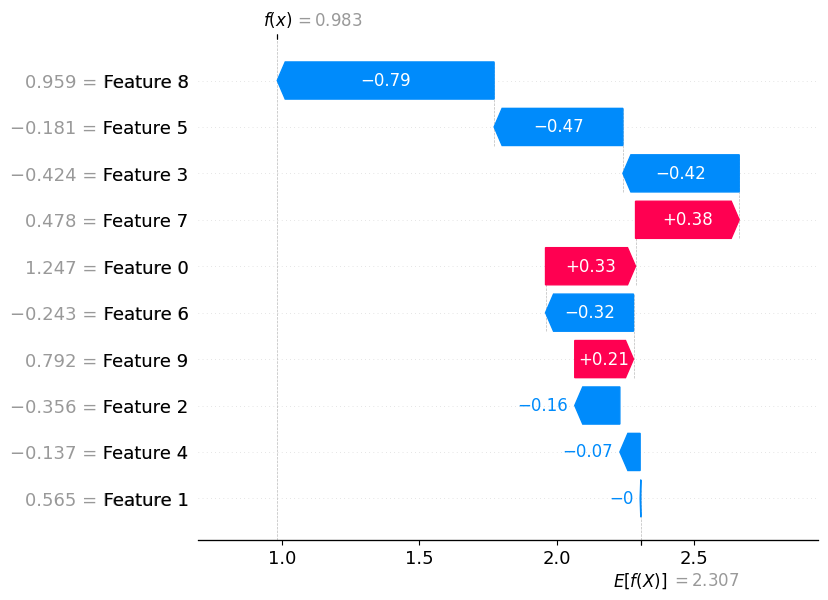

IndexError: index 1 is out of bounds for axis 0 with size 1

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import shap

# Load your dataset
data = df.copy().dropna()

# Identify non-numeric columns and encode them using Label Encoding
non_numeric_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in non_numeric_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numeric columns (excluding 'class') using StandardScaler
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('class')
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Assuming 'class' is the column with binary labels (0 for Healthy, 1 for Disease)
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(model, X_train)

# Explain the predictions on a single instance (e.g., the first instance in the test set)
sample_instance = X_test.iloc[0]
shap_values = explainer(sample_instance.values.reshape(1, -1))

# Print the SHAP values and expected value
print("SHAP Values:", shap_values.values)
print("Expected Value:", explainer.expected_value)

# Create a waterfall plot for the first instance
shap.plots.waterfall(shap_values[0])

# Summary plot to show feature importance
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)


SHAP Values: .values =
array([[ 0.32792194, -0.00240346, -0.16442281, ...,  0.37768059,
        -0.79001139,  0.21411293],
       [-0.1135454 , -0.00240346, -0.04977588, ...,  0.4377252 ,
        -0.31695068, -0.02827907],
       [-0.14886279,  0.01361961, -0.18830758, ..., -0.28281011,
         0.15611003, -0.02827907],
       ...,
       [-0.14886279, -0.00240346, -0.14531499, ..., -0.2227655 ,
         0.06149789,  0.05251827],
       [ 0.01006546, -0.00240346, -0.17397672, ...,  0.55781442,
        -1.16845995,  0.3757076 ],
       [ 0.4162154 ,  0.01361961, -0.17397672, ..., -0.16272089,
         0.25072218, -0.2060332 ]])

.base_values =
array([2.30704579, 2.30704579, 2.30704579, 2.30704579, 2.30704579,
       2.30704579, 2.30704579, 2.30704579, 2.30704579, 2.30704579,
       2.30704579, 2.30704579, 2.30704579, 2.30704579, 2.30704579,
       2.30704579, 2.30704579, 2.30704579, 2.30704579, 2.30704579,
       2.30704579, 2.30704579, 2.30704579, 2.30704579, 2.30704579,
       2.3070

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


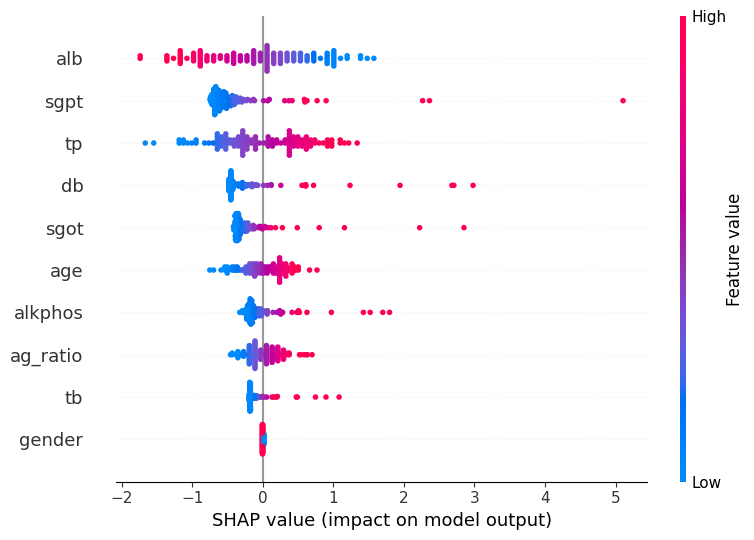

In [22]:
# ...

# Explain the predictions on the test set
shap_values = explainer(X_test)

# Print the SHAP values and expected value
print("SHAP Values:", shap_values)
print("Expected Value:", explainer.expected_value)

# Summary plot to show feature importance
shap.summary_plot(shap_values, X_test)

# ...
